In [52]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
import funcs as func
import sys
import pdb
import glob
import matplotlib.pyplot as plt
import scipy.stats as sp_st
import os
import ddm
import ddm.models
from ddm import Model, Fittable
from ddm.functions import fit_adjust_model, display_model
from ddm.models import NoiseConstant, BoundConstant, OverlayChain, OverlayNonDecision, OverlayPoissonMixture
from ddm import Sample
from ddm import set_N_cpus


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cwd = os.getcwd()

print(cwd)
data_dir = cwd+"/Data/Y_maze/data_with_animal_ids/"
data_target_dir = cwd+"/Data/processed_data/Y_maze/data_with_animal_ids/"
figure_dir = cwd+"/Figures/"

plt.rcParams["figure.facecolor"] = "w"

/home/jyotika/2-arm-bandit-task


In [53]:
set_N_cpus(4)

In [54]:
log_likelihood_ratio = pd.read_csv(data_target_dir+"log_likelihood_ratio.csv")

In [55]:
log_likelihood_ratio

,Unnamed: 0,animal_id,conflict,volatility,condition,session,block_num,trial_num,optimal_action,RT(ms),log_likelihood_ratio,block_num(grouped)
0,246448,1,High,High,iSPN-Control,0,1,0,1.0,390,0.000000,0
1,246449,1,High,High,iSPN-Control,0,1,1,0.0,179,0.000000,0
2,246450,1,High,High,iSPN-Control,0,1,2,0.0,244,2.197225,0
3,246451,1,High,High,iSPN-Control,0,1,3,0.0,357,3.295837,0
4,246452,1,High,High,iSPN-Control,0,1,4,0.0,162,4.394449,0
...,...,...,...,...,...,...,...,...,...,...,...,...
277730,211721,10,No,Low,dSPN-Stim,5,9,1,0.0,5069,0.000000,1
277731,211722,10,No,Low,dSPN-Stim,5,9,2,1.0,473,4.394449,1
277732,211723,10,No,Low,dSPN-Stim,5,9,3,1.0,8917,6.591674,1
277733,211724,10,No,Low,dSPN-Stim,5,9,4,1.0,2664,8.788898,1


In [56]:
df = log_likelihood_ratio.loc[(log_likelihood_ratio["conflict"]=="No")&(log_likelihood_ratio["volatility"]=="Low")& (log_likelihood_ratio["condition"]=="dSPN-Control")&(log_likelihood_ratio["animal_id"]==2)&(log_likelihood_ratio["session"]==33)&(log_likelihood_ratio["block_num"]==1)]
df = df.rename(columns={"RT(ms)":"rt","optimal_action":"correct"})
df["rt"] = df["rt"]/1000.


#

In [57]:
df

,Unnamed: 0,animal_id,conflict,volatility,condition,session,block_num,trial_num,correct,rt,log_likelihood_ratio,block_num(grouped)
56857,165218,2,No,Low,dSPN-Control,33,1,0,0.0,1.007,0.000000,0
56858,165219,2,No,Low,dSPN-Control,33,1,1,0.0,2.582,0.000000,0
56859,165220,2,No,Low,dSPN-Control,33,1,2,0.0,4.910,4.394449,0
56860,165221,2,No,Low,dSPN-Control,33,1,3,0.0,4.287,6.591674,0
56861,165222,2,No,Low,dSPN-Control,33,1,4,0.0,2.290,8.788898,0
56862,165223,2,No,Low,dSPN-Control,33,1,5,1.0,5.108,10.986123,0
56863,165224,2,No,Low,dSPN-Control,33,1,6,0.0,1.771,13.183347,0
56864,165225,2,No,Low,dSPN-Control,33,1,7,0.0,4.222,15.380572,0
56865,165226,2,No,Low,dSPN-Control,33,1,8,1.0,3.070,17.577797,0
56866,165227,2,No,Low,dSPN-Control,33,1,9,1.0,2.468,19.775021,0


In [58]:
ymaze_sample = Sample.from_pandas_dataframe(df, rt_column_name="rt", correct_column_name="correct")

In [59]:
class DriftLLR(ddm.models.Drift):
    name = "Drift depends linearly on llr"
    required_parameters = ["drift_llr"] # <-- Parameters we want to include in the model
    required_conditions = ["log_likelihood_ratio"] # <-- Task parameters ("conditions"). Should be the same name as in the sample.
    
    # We must always define the get_drift function, which is used to compute the instantaneous value of drift.
    def get_drift(self, conditions, **kwargs):
        return self.drift_llr * conditions['log_likelihood_ratio']
    
class DriftLLRLeak(ddm.models.Drift):
    name = "Leaky drift depends linearly on llr"
    required_parameters = ["drift_llr", "leak"] # <-- Parameters we want to include in the model
    required_conditions = ["log_likelihood_ratio"] # <-- Task parameters ("conditions"). Should be the same name as in the sample.
    
    # We must always define the get_drift function, which is used to compute the instantaneous value of drift.
    def get_drift(self, x, conditions, **kwargs):
        return self.drift_llr * conditions['log_likelihood_ratio'] + self.leak * x    


In [103]:
from ddm.models import Bound

class BoundLinearDecrease(Bound):
    name = "Linearly decrease over trials"
    required_conditions = ["trial_num"]
    required_parameters = ["B0", "slope"]
    def get_bound(self,conditions, **kwargs):
        delta_b = conditions["trial_num"]*self.slope
        b = self.B0 + delta_b
        return b
class Boundconstant(Bound):
    name = "Linearly decrease over trials"
    required_conditions = []
    required_parameters = ["B0"]
    def get_bound(self, **kwargs):
        
        b = self.B0 
        return b    

In [105]:
# model_ym = Model(name='Y_maze data, drift varies with llr',
#                  drift=DriftLLR(drift_llr=Fittable(minval=0, maxval=20)),
#                  noise=NoiseConstant(noise=1),
#                  bound=BoundConstant(B=Fittable(minval=.1, maxval=1.5)),
#                  # Since we can only have one overlay, we use
#                  # OverlayChain to string together multiple overlays.
#                  # They are applied sequentially in order.  OverlayNonDecision
#                  # implements a non-decision time by shifting the
#                  # resulting distribution of response times by
#                  # `nondectime` seconds.
#                  overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fittable(minval=0, maxval=.4)),
#                                                 OverlayPoissonMixture(pmixturecoef=.02,
#                                                                       rate=1)]),
#                  dx=.001, dt=.01, T_dur=50)




from ddm.models import BoundCollapsingExponential, BoundCollapsingLinear
model_leak = Model(name='Y_maze data, leaky drift varies with llr',
                   drift=DriftLLR(drift_llr=Fittable(minval=0, maxval=20)),
                   #drift=DriftLLRLeak(drift_llr=Fittable(minval=-10, maxval=10),
                                            #leak=Fittable(minval=-10, maxval=10)),
                   
                   noise=NoiseConstant(noise=1),
                   
                   bound=BoundLinearDecrease(B0=Fittable(minval=0.1, maxval=6),
                                             slope=Fittable(minval=-0.0001, maxval=0.1)),
#                    bound=Boundconstant(B0=Fittable(minval=0.1, maxval=6)),
                                             
                                      
                   # Since we can only have one overlay, we use
                   # OverlayChain to string together multiple overlays.
                   # They are applied sequentially in order.  OverlayDelay
                   # implements a non-decision time by shifting the
                   # resulting distribution of response times by
                   # `delaytime` seconds.
                   overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fittable(minval=0, maxval=.4)),
                                                  OverlayPoissonMixture(pmixturecoef=.02,
                                                                        rate=1)]),
                   
                   dx=.01, dt=.01, T_dur=len(df))

# Fitting this will also be fast because PyDDM can automatically
# determine that DriftCoherence will allow an analytical solution.
# fit_model_rs = fit_adjust_model(sample=ymaze_sample, model=model_ym, verbose=True)
fit_model_rs = fit_adjust_model(sample=ymaze_sample, model=model_leak, verbose=True,lossfunction=ddm.models.loss.LossRobustLikelihood)


Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(17.551471394207496, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.6252542562497942, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.13391343828711733, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=1099.353172855663
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(11.452010151757982, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.773724250636005, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.3609557098268026, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=746.5903939352033
Model(name='Y_maze data, leaky drift varies with l

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(7.952101891335207, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.4797959932994513, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.3529631402934423, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=580.0161233202288
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(12.990935293918541, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.4082123082312581, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.026758341191191526, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=1087.4654502197795
Model(name='Y_maze data, leaky drift varies with

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(15.152835805238976, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.537432286338817, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.09691095856418577, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=771.3341886391925
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.8295768833190955, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(5.232224512150093, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.04208618115198384, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=181.73986377382718
Model(name='Y_maze data, leaky drift varies with 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(15.459335051527125, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.6501321790860564, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.305143543641627, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=879.418405632096
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.8341785212194779, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.7552115625895373, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.3451838533832932, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=185.07017631122926
Model(name='Y_maze data, leaky drift varies with ll

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(3.6182234457294555, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.4013985996458995, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.28536390163197944, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=281.5399077058982
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(17.913170934908386, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.311667858427811, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.18850595127019193, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=894.9198496036121
Model(name='Y_maze data, leaky drift varies with 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.6571197342016326, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.688010679176987, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10955165471989603, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=157.94467834334563
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.4861078709193052, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.485743139187815, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.2479391133593869, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=167.98391420413589
Model(name='Y_maze data, leaky drift varies with 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(10.566151714125336, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.356999441019434, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10889099982312983, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=757.2040646802656
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(4.401400591132658, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.3758545934605046, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.06067285232509334, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=260.2796872067151
Model(name='Y_maze data, leaky drift varies with l

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.4861078709193052, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(5.869769644954173, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.2381454503410368, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=177.561387285276
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(18.05148212955501, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5235444620586285, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.08486414412078591, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=1013.8814949229125
Model(name='Y_maze data, leaky drift varies with ll

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(17.890891432116014, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.406769062959205, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.12993961860066253, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=840.9900790040111
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(17.58228586538725, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(5.344693661257912, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.09502918565886964, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=799.5567576197719
Model(name='Y_maze data, leaky drift varies with ll

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(4.713573198861063, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.651317776898606, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.20668244734909066, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=382.381628203574
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.7327335986266483, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.4759165348177192, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.1650922530802046, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=158.2097505651963
Model(name='Y_maze data, leaky drift varies with llr

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(6.56934559665819, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.890753914803893, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.24053114772862094, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=475.812841785921
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(11.519060359344081, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.8707429537285325, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.12889591053914495, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=599.2978659785211
Model(name='Y_maze data, leaky drift varies with llr

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.3425199409742099, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.219103580043571, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.06865082004719827, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=153.93602793227322
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(2.0550561719338845, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.61763473299372, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.1956715560397887, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=188.6410579802203
Model(name='Y_maze data, leaky drift varies with ll

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.6757923983975918, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.4431557681987255, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.043932197428710656, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=180.1359803612829
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(3.1410336898006026, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.7580600898245708, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.08637889012495054, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=217.12919209242523
Model(name='Y_maze data, leaky drift varies wi

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.06745762974920666, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(5.60600572370748, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10210252134621532, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=116.2174400457559
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(10.327434906545061, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.168543435445897, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.016289541787200934, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=661.42687144578
Model(name='Y_maze data, leaky drift varies with ll

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(6.625848072368699, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.8812318997364, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.37182529919523205, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=418.44184983889755
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(2.817152509371523, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.288485811787369, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10955165471989603, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=192.64409116862376
Model(name='Y_maze data, leaky drift varies with llr

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.06627575643647887, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.406769062959205, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.32453380725977804, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=110.68418961976458
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.32401393656165034, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.8208784172707837, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.1798184697146859, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=155.35897877124737
Model(name='Y_maze data, leaky drift varies wi

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.13962842154425026, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.1937180125235334, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.05160459435377743, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=131.95403113848602
differential_evolution step 6: f(x)= 84.4391
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.03053160351848838, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.374563968302769, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.01349046398810852, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=95.83074539531854
M

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.037420379266562165, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.72909571014387, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.36725008971323375, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=93.71124403719372
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(19.300778346603234, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(5.463098943095382, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.052796834836648515, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=837.9170200353501
Model(name='Y_maze data, leaky drift varies with

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.7111201079182088, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.743393366717608, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.1429847068976301, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=158.54896413315024
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.13962842154425026, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.535438952327316, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.03310185264933285, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=133.87534548221282
differential_evolution step 7: f(x)= 84.4391
Mod

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.4934204346862217, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5356291565928224, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10285628605036944, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=175.71395162583994
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.6567671346979349, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.5768118051201312, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.02086142633760113, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=180.9148193333532
Model(name='Y_maze data, leaky drift varies wit

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.023348687772003274, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.7957887710405833, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.22753253976117238, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=101.59505248128103
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.1375106076595607, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.9581380425928847, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.12553492172101083, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=137.06447815073238
Model(name='Y_maze data, leaky drift varies 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.08981137238948023, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.0104853167807288, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.15027722468674598, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=116.27663885707393
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.02883296376588973, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.5592407851949233, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.02991128381188371, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=99.17475321530237
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.09403127969992475, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(5.47519888936387, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.17326835093350665, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=124.48932611267128
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(3.5357612225881514, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(4.034765224544989, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.012515374639901988, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=214.242913568299
Model(name='Y_maze data, leaky drift varies with 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.9802178162113702, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.2001710522467706, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.05281803815490488, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=177.55632645378304
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(4.956957704983871, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.11770393712560345, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.21856449340351106, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=984.5423203623436
Model(name='Y_maze data, leaky drift varies wit

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(9.821544202893001, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(3.310774124528078, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.06887732288038986, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=613.8876361434562
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.02432051128057644, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.7881721987049917, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.04268644167239946, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=64.27745621672051
Model(name='Y_maze data, leaky drift varies with 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.06519944329519944, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.234991956518261, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.14237125413759674, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=97.60288169205106
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.6439969945890116, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.8657501595971513, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.17554081739604124, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=164.30965781449453
Model(name='Y_maze data, leaky drift varies wit

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.4095118131722373, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5604396925702086, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.18782735678779022, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=152.787060832754
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.006370728199048159, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.948987551420547, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.05892705490766889, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=93.87930759423257
Model(name='Y_maze data, leaky drift varies with

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.7030444373835802, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.9443076616702957, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10978675508606715, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=176.8457382665519
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(11.136673981212365, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.3244117474930668, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.2716044059570757, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=917.2232198590382
Model(name='Y_maze data, leaky drift varies with 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01458211867986492, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.7603720028801537, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.016668770173410424, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=107.78168747831276
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.027696901117419515, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.9628339998539595, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.09188405109179987, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=71.76034474596455
Model(name='Y_maze data, leaky drift varies

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.026330052614671473, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.9098811335969521, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.027421674352930497, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=88.31278004967757
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.11264863505051181, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.549795567625748, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.012742203389897261, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=114.39696016670779
Model(name='Y_maze data, leaky drift varies

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.027397553331031332, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.058136407534443, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.05841697708839022, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=71.19536361205756
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.025924001048556633, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.1816019522425814, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.09483340225501197, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=76.05540709421285
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.001992723576261568, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.7089692740847138, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.02897941309216573, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=68.75397942572754
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.0847215090380935, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.7226705772011788, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.3645058406087993, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=125.20497636748736
Model(name='Y_maze data, leaky drift varies wi

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.037312058004133064, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(2.0119869135068518, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.354795026932725, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=85.05033065957775
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.020131213624225097, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.9880289568613492, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.16913563678849905, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=75.1920346983954
Model(name='Y_maze data, leaky drift varies wit

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.02397521980998185, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4456602357780037, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.3398032242483591, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=77.00444870629659
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.03103615866701226, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.3297834284817365, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.02897941309216573, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=64.60547589354609
Model(name='Y_maze data, leaky drift varies wit

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.03985535000299478, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.49077514430287, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.05285509585978296, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=68.57989125512297
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.015350482445718683, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.7129521352008594, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.042452578004975455, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=63.519766780905364
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.017123835455807424, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.3790069795671602, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.032743004142600896, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.30097171947488
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01075131297750076, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.581493601716447, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.03942747241661759, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=62.24591801093378
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.02794620192729269, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.585270176560294, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.07962434697861216, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=63.5472937510394
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.008963437919717876, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.6525698264608466, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.0025253838627600778, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=62.8784582623757
Model(name='Y_maze data, leaky drift varies wi

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.03129487870521075, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.421073877946611, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.0026059107660984793, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=63.19649735208635
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.02687897535625261, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.449268633668794, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004507840849401812, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.97237531992272
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.0073145794560360855, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4944277342428212, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.21061692418108646, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=72.47547572971794
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.012037411938278453, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.8158081383484501, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.015577244003619928, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=65.11614137585272
Model(name='Y_maze data, leaky drift varie

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.018002509874280648, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.657246799920346, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.005362740237164376, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.45352137232815
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.011843869690391529, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.6845527454171145, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.07303120347103889, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=65.67364800961768
Model(name='Y_maze data, leaky drift varies 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01640305021330235, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.578526630239323, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.11901160530513609, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=65.39420061877988
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.028294246100497134, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.7061477082398349, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.04812130399282474, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=63.52928894342924
Model(name='Y_maze data, leaky drift varies wi

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01170346697788105, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.545543415254501, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.0600020762902663, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=62.77754197740886
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.016293191981466393, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(0.9633819807793835, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.11786517866364794, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=76.82807312535554
Model(name='Y_maze data, leaky drift varies wit

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01675490672291957, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4547093849290877, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.2813782919073063, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=74.80197665343964
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.018761101162015237, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5898131053496225, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.055722725576441395, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=61.571420854129315
Model(name='Y_maze data, leaky drift varies 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.010570686570819277, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.381173472188451, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.10840913443459446, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=63.691771880075855
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01872218927551117, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5289334513509163, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.03543472512111412, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.21566508361815
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.021627863814009274, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.3790069795671602, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.014402492954050605, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.39150938005748
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01716184814945798, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.473713296067408, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.012061763029465933, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.60314884554015
Model(name='Y_maze data, leaky drift varies 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01823784693783459, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5031129467717663, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.022553517057770006, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.82729852588
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01625060549623214, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.3325707862351999, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.0023910442536030363, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.559535836698934
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.017544754088259396, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4503489691789455, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.012696020249302192, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.61445618830684
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01855027806251286, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.6052376261547128, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.03785693354248565, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.891111033579655
Model(name='Y_maze data, leaky drift varies

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.015750263022418665, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5187635287973233, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.020528385102889457, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.09788523271782
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.015565161878543066, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4469723882925878, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.044476099689323284, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=60.43414555309137
Model(name='Y_maze data, leaky drift varie

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.018286249086639117, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4927933100484254, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.19625155961115046, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=69.82056407475073
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.017544754088259396, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5559760454725888, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.17139311005922664, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=69.14117298695679
Model(name='Y_maze data, leaky drift varies 

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.4559428520845865, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4315820616894304, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004351483540909862, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=175.8893769296021
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(1.4559428620845865, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4315820616894304, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004351483540909862, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=175.88937716197842
Model(name='Y_maze data, leaky drift varies w

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.018785418379048825, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5007286382136638, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004351483540909862, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.3799968813746
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.018785428379048827, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.5007286382136638, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004351483540909862, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.37999689928618
Model(name='Y_maze data, leaky drift varies

Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.01868949551771199, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4925646620483435, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004351483540909862, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.37759170170339
Model(name='Y_maze data, leaky drift varies with llr', drift=DriftLLR(drift_llr=Fitted(0.018689485517711987, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=Boundconstant(B0=Fitted(1.4925646720483434, minval=0.1, maxval=6)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.004351483540909862, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.01, dt=0.01, T_dur=25) loss=59.37759168193822
Model(name='Y_maze data, leaky drift varies

In [106]:
display_model(fit_model_rs)

Model Y_maze data, leaky drift varies with llr information:
Drift component DriftLLR:
    Drift depends linearly on llr
    Fitted parameters:
    - drift_llr: 0.018645 (WARNING: AT BOUNDARY)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component Boundconstant:
    Linearly decrease over trials
    Fitted parameters:
    - B0: 1.492903
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fitted parameters:
        - nondectime: 0.004351
    Overlay component OverlayPoissonMixture:
        Poisson distribution mixture model (lapse rate)
        Fixed parameters:
        - pmixturecoef: 0.020000
        - rate: 1.000000
Fit information:
    Loss function: Negative log likelihood
    Loss function value: 59.37754017157317
    Fitting method: differential_evolution
    Solver: auto
  

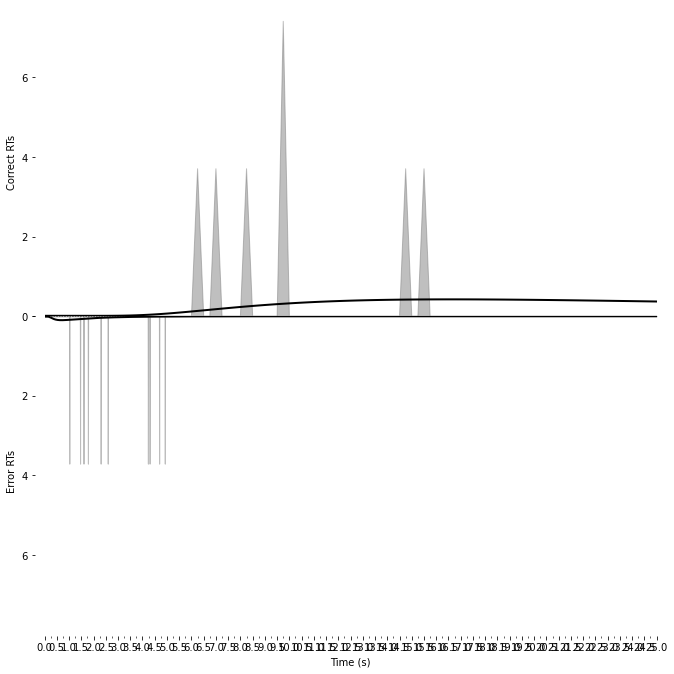

In [107]:
import ddm.plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ddm.plot.plot_fit_diagnostics(model=fit_model_rs, sample=ymaze_sample,fig=fig)
xlims = fig.axes[0].get_xlim()
fig.axes[0].set_xlim(xlims[0],1)

plt.savefig(figure_dir+"ymaze-fit_collapsing_bound.png")


In [108]:
fig.axes[0].get_xlim()

(0.0, 1.0)

In [109]:
model_leak.get_fit_result()

FitResult(fitting_method='differential_evolution', method='auto', loss='Negative log likelihood', value=59.37754017157317, nparams=3, samplesize=27, mess='')

In [110]:



model_leak.get_model_parameter_names()

['drift_llr', 'B0', 'nondectime']

In [111]:
model_leak.get_model_parameters()

[Fitted(0.018644801593125475, minval=0, maxval=20),
 Fitted(1.4929029053669531, minval=0.1, maxval=6),
 Fitted(0.004351483540909862, minval=0, maxval=0.4)]

In [112]:
results = pd.DataFrame()
results["parameter_names"] = model_leak.get_model_parameter_names()
results["parameters"] = model_leak.get_model_parameters()
results.to_csv(data_target_dir+"collapsing_bounds.csv")

In [113]:
df 

,Unnamed: 0,animal_id,conflict,volatility,condition,session,block_num,trial_num,correct,rt,log_likelihood_ratio,block_num(grouped),drift_rate,a,a/v
56859,165220,2,No,Low,dSPN-Control,33,1,2,0.0,4.910,4.394449,0,0.081933,1.492913,18.221071
56860,165221,2,No,Low,dSPN-Control,33,1,3,0.0,4.287,6.591674,0,0.122900,1.492912,12.147372
56861,165222,2,No,Low,dSPN-Control,33,1,4,0.0,2.290,8.788898,0,0.163867,1.492911,9.110523
56862,165223,2,No,Low,dSPN-Control,33,1,5,1.0,5.108,10.986123,0,0.204833,1.492910,7.288414
56863,165224,2,No,Low,dSPN-Control,33,1,6,0.0,1.771,13.183347,0,0.245800,1.492909,6.073674
56864,165225,2,No,Low,dSPN-Control,33,1,7,0.0,4.222,15.380572,0,0.286767,1.492908,5.206003
56865,165226,2,No,Low,dSPN-Control,33,1,8,1.0,3.070,17.577797,0,0.327733,1.492907,4.555249
56866,165227,2,No,Low,dSPN-Control,33,1,9,1.0,2.468,19.775021,0,0.368700,1.492906,4.049108
56867,165228,2,No,Low,dSPN-Control,33,1,10,1.0,2.272,21.972246,0,0.409667,1.492905,3.644195
56868,165229,2,No,Low,dSPN-Control,33,1,11,0.0,4.676,24.169470,0,0.450633,1.492904,3.312902


In [114]:
model_leak.dependencies[0].get_drift(df)

56859    0.081934
56860    0.122900
56861    0.163867
56862    0.204834
56863    0.245801
56864    0.286768
56865    0.327735
56866    0.368701
56867    0.409668
56868    0.450635
56869    0.491602
56870    0.532569
56871    0.573535
56872    0.614502
56873    0.655469
56874    0.696436
56875    0.737403
56876    0.778370
56877    0.819336
56878    0.860303
56879    0.901270
56880    0.942237
56881    0.983204
56882    1.024170
56883    1.065137
Name: log_likelihood_ratio, dtype: float64

In [116]:
# model_leak.dependencies[2].get_bound(df)
model_leak.dependencies[2].get_bound()

Fitted(1.4929029053669531, minval=0.1, maxval=6)

In [117]:
df["drift_rate"] = model_leak.dependencies[0].get_drift(df).values #df["log_likelihood_ratio"]*results.loc[results["parameter_names"]=='drift_llr']["parameters"].values

In [118]:
# delta_b = results.loc[results["parameter_names"]=="t"]["parameters"].values[0]
# init_b = results.loc[results["parameter_names"]=="B"]["parameters"].values[0]
# df["a"] = model_leak.dependencies[2].get_bound(df)
df["a"] = model_leak.dependencies[2].get_bound()


In [119]:
df["a/v"] = df["a"]/df["drift_rate"]

In [120]:
df = df.replace(np.inf,np.nan)

In [121]:
df = df.dropna()

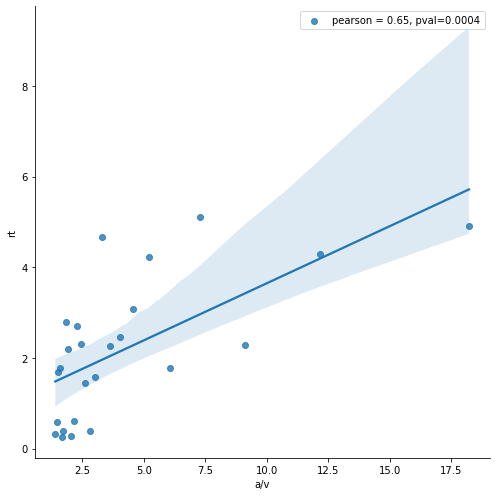

In [122]:

g1 = sns.lmplot(x="a/v",y="rt",data=df,height=7,aspect=1)
r, pvalue = sp_st.pearsonr(df["a/v"],df["rt"])
for ax in g1.axes[0]:
    ax.collections[0].set_label(f'pearson = {r:.2f}, pval={pvalue:.4f}')
    ax.legend()
g1.fig.savefig(figure_dir+"rt_vs_av.png")

In [123]:
to_plot = df[["a","drift_rate","rt","log_likelihood_ratio","trial_num"]].copy()
to_plot_melted = to_plot.melt(id_vars="trial_num")

In [124]:
to_plot_melted["variable_type"] = [ "ddm" if x == "a" or x == "drift_rate" else "RT" if x == "rt" else "LLR"  for x in to_plot_melted["variable"]]

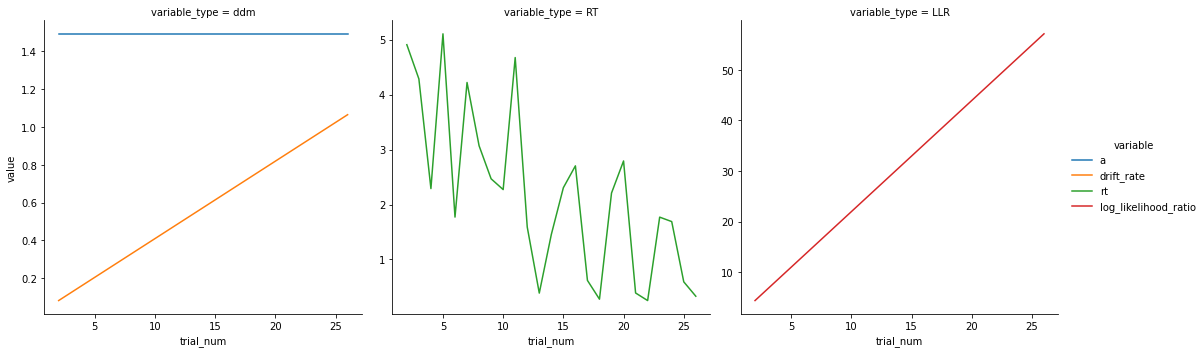

In [125]:

g1 = sns.relplot(x="trial_num",y="value",data=to_plot_melted,col="variable_type",hue="variable",kind='line',facet_kws={'sharey':False})
g1.fig.savefig(figure_dir+"rt_fit_animal_id_2_session_33.png")